# **EXECUTIVE SUMMARY**    
The objective of this project is to build a machine learning model that will predict taxicab trip fare before riding based on 2022 NYC Yellow Cab trip record data (https://data.cityofnewyork.us/Transportation/2022-Yellow-Taxi-Trip-Data/qp3b-zxtp).
To that end, I will demonstrate the phases of the data science pipeline:
1. **[Random Sampling](#sampl)** Make a Random Sample from the large original CSV file with (39.7 Milions rows & Size More than 3.5 GB) to make the analysis and modeling process more efficient.
2. **[Exploratory Data Analysis-EDA](#eda)**
    1. **[Discovering & Structuring](#discStruc)** Check out the overall shape, size, and content of the dataset and transform the data into a usable format for analysis.
    2. **[Cleaning](#clean)**: Check for outliers, missing data, and needs for conversions or transformations.
    3. **[Feature Engineering](#fEng)**:
        1. **[Feature Transformation](#fTrans)**
        2. **[Feature Selection](#fSel)**
        3. **[Feature Engineering](#fEng2)**
    4. **[Validating](#Valid)** Validate Data to ensure it's ready for modeling phase.
    5. **[Presenting](#present)**: Presenting EDA findings.
3. **[Algorithm Development](#ml)**: Train, test, and refine various models to predict the target variable.  Given that our dependent variable `trip_duration` is a continuous outcome,  the regression algorithms to be protoyped are as follows:
 - [Multivarite Linear Regression](#linear)  


4. **[Model Deployment](#deployment)**: Apply the best performing model to the test set for contest submission.


# **ABOUT THE DATA**  
The  dataset is based on the 2022 NYC Yellow Cab trip record data. Its variables are as follows:

| **Variable Name** | **Description** | **Type**|          
| :------------------ |:-------------|:-------------|   
|vendor_id    | A code indicating the TPEP provider that provided the record.     | Number|
|pickup_datetime |  date and time when the meter was engaged|  Data & Time|
|dropoff_datetime|  date and time when the meter was disengaged|  Data & Time|
|passenger_count|  the number of passengers in the vehicle (driver entered value)|  Number|
|trip_distance |  The elapsed trip distance in miles reported by the taximeter.| Number|
|RatecodeID | The final rate code in effect at the end of the trip. | Number |
|PULocationID | TLC Taxi Zone in which the taximeter was engaged|  Number |
|DOLocationID  |   TLC Taxi Zone in which the taximeter was disengaged|  Number |
|store_and_fwd_flag | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip   | Plain-text|
|payment_type | A numeric code signifying how the passenger paid for the trip. | Number |
|fare_amount | 	The time-and-distance fare calculated by the meter. | Number |
|extra | Miscellaneous extras and surcharges. | Number |
|mta_tax | 	Tax that is automatically triggered based on the metered rate in use.| Number |
|tip_amount | This field is automatically populated for credit card tips. Cash tips are not included. | Number|
|tolls_amount | Total amount of all tolls paid in trip. | Number |
|improvement_surcharge | Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. | Number |
|total_amount | The total amount charged to passengers. Does not include cash tips. | Number|
|congestion_surcharge | Total amount collected in trip for NYS congestion surcharge. | Number |
|airport_fee | For pick up only at LaGuardia and John F. Kennedy Airports. | Number |


## <a id="sampl"></a> **1.Random Sampling:**
- The original CSV file contain 3.97 milions record (more than 3.5 GB), So to make the Analysis and Modeling process more efficient we will get a random sample with (1 milion rocord) to work in it.

**I completed this step in (Random Sampling from Large CSV file.ipynb) notebook.**

## <a id="eda"></a>**2. EDA**

In [1]:
# importing Important libraries
import warnings
import datetime
warnings.filterwarnings("ignore")

# Import useful liberires 
import pandas as pd
import numpy as np

# Visualision Libraries
import matplotlib.pyplot as plt
import seaborn as sns

### 2.a <a id='discStruc'></a> **Discovering & Structuring**

In [2]:
# Load our DataFrame from The Sample Data
df0 = pd.read_csv('Random_Sample_2022_Yellow_Taxi_Trip_Data.csv')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,2,01/01/2022 12:40:12 AM,01/01/2022 01:07:08 AM,1.0,5.43,1.0,N,68,263,1,21.0,0.5,0.5,4.00,0.0,0.3,28.80,2.5,0.0
1,1,1,01/01/2022 12:31:53 AM,01/01/2022 12:36:31 AM,0.0,1.30,1.0,N,140,229,1,6.0,3.0,0.5,2.90,0.0,0.3,12.70,2.5,0.0
2,2,2,01/01/2022 12:43:07 AM,01/01/2022 12:51:17 AM,1.0,1.86,1.0,N,239,237,1,8.5,0.5,0.5,2.46,0.0,0.3,14.76,2.5,0.0
3,3,2,01/01/2022 12:36:17 AM,01/01/2022 12:41:48 AM,2.0,1.30,1.0,N,249,90,1,6.0,0.5,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,4,2,01/01/2022 12:55:14 AM,01/01/2022 01:11:18 AM,1.0,4.58,1.0,N,161,24,1,16.0,0.5,0.5,3.96,0.0,0.3,23.76,2.5,0.0


In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             998859 non-null  int64  
 1   VendorID               998859 non-null  int64  
 2   tpep_pickup_datetime   998859 non-null  object 
 3   tpep_dropoff_datetime  998859 non-null  object 
 4   passenger_count        964497 non-null  float64
 5   trip_distance          998859 non-null  float64
 6   RatecodeID             964497 non-null  float64
 7   store_and_fwd_flag     964497 non-null  object 
 8   PULocationID           998859 non-null  int64  
 9   DOLocationID           998859 non-null  int64  
 10  payment_type           998859 non-null  int64  
 11  fare_amount            998859 non-null  float64
 12  extra                  998859 non-null  float64
 13  mta_tax                998859 non-null  float64
 14  tip_amount             998859 non-nu

Our Data has 998859 (~= 1 milion record) and 20 columns, and Notice (passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, airport_fee) have 964497 non-null rows, So There are 34362 rows have missing values in this 5 features, We will take care of that later.

**After reading data documentation:**

1- I have noticed that there are some columns irrelevent to our objective, so we will drop it to simplify and increase efficency of our analysis and modeling.

- First we will drop "Unnamed:0" because it's like the index of records.
- Secondaly we will drop ("extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge", "airport_fee"), Because they are addational amount based in some laws, and doesn't affect the fare amount, but they are added to it, to form the total amount.

In [4]:
# Droping irrelevant features
df0.drop(columns=["Unnamed: 0","extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge","airport_fee"], axis=1, inplace= True)
df0.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount
0,2,01/01/2022 12:40:12 AM,01/01/2022 01:07:08 AM,1.0,5.43,1.0,N,68,263,1,21.0
1,1,01/01/2022 12:31:53 AM,01/01/2022 12:36:31 AM,0.0,1.30,1.0,N,140,229,1,6.0
2,2,01/01/2022 12:43:07 AM,01/01/2022 12:51:17 AM,1.0,1.86,1.0,N,239,237,1,8.5
3,2,01/01/2022 12:36:17 AM,01/01/2022 12:41:48 AM,2.0,1.30,1.0,N,249,90,1,6.0
4,2,01/01/2022 12:55:14 AM,01/01/2022 01:11:18 AM,1.0,4.58,1.0,N,161,24,1,16.0


2- We can classify features as quantative and qualitative features:
1. Quantative features:
 - tpep_pickup_datetime.
 - tpep_dropoff_datetime.
 - passenger_count.
 - trip_distance.
 - fare amount.
2. Qualitative features:
 - VendorID.
 - RateCodeID.
 - store_and_fwd_flag.
 - PULocationID.
 - DOLocationID.
 - payment_type.
 
Firstly, We will convert qualitative columns datatype to categorical data.

In [5]:
df0['VendorID'] = df0['VendorID'].astype('category')
df0['RatecodeID'] = df0['RatecodeID'].astype('category')
df0['store_and_fwd_flag'] = df0['store_and_fwd_flag'].astype('category')
df0['PULocationID'] = df0['PULocationID'].astype('category')
df0['DOLocationID'] = df0['DOLocationID'].astype('category')
df0['payment_type'] = df0['payment_type'].astype('category')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   VendorID               998859 non-null  category
 1   tpep_pickup_datetime   998859 non-null  object  
 2   tpep_dropoff_datetime  998859 non-null  object  
 3   passenger_count        964497 non-null  float64 
 4   trip_distance          998859 non-null  float64 
 5   RatecodeID             964497 non-null  category
 6   store_and_fwd_flag     964497 non-null  category
 7   PULocationID           998859 non-null  category
 8   DOLocationID           998859 non-null  category
 9   payment_type           998859 non-null  category
 10  fare_amount            998859 non-null  float64 
dtypes: category(6), float64(3), object(2)
memory usage: 45.7+ MB


Secondly, Convert (tpep_pickup_datetime, tpep_dropoff_datetime) from object to datetime datatype.

In [6]:
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998859 entries, 0 to 998858
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               998859 non-null  category      
 1   tpep_pickup_datetime   998859 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  998859 non-null  datetime64[ns]
 3   passenger_count        964497 non-null  float64       
 4   trip_distance          998859 non-null  float64       
 5   RatecodeID             964497 non-null  category      
 6   store_and_fwd_flag     964497 non-null  category      
 7   PULocationID           998859 non-null  category      
 8   DOLocationID           998859 non-null  category      
 9   payment_type           998859 non-null  category      
 10  fare_amount            998859 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(3)
memory usage: 45.7 MB


Discover the distrbution of continues features

In [7]:
df0.describe()

,passenger_count,trip_distance,fare_amount
count,964497.000000,998859.000000,998859.000000
mean,1.400979,6.275239,14.794281
std,0.962464,712.392823,14.244236
min,0.000000,0.000000,-605.000000
25%,1.000000,1.100000,7.000000
50%,1.000000,1.900000,10.500000
75%,1.000000,3.560000,16.500000
max,8.000000,330578.660000,950.000000


**Important Notices:**
- passenger_count is a discreate value so better to use bar chart to understand it better.
- trip_distance and fare_amount have a big difference between their mean and median and it's indicator about outliers, Plus they also have a very big maximum values.
- fare_amount has a negative values and that doesn't make sense.


We will take care of this outliers and errors later in the cleaning stage.

,passenger_count,count
0,0.0,19183
1,1.0,711987
2,2.0,147792
3,3.0,38880
4,4.0,17873
5,5.0,17161
6,6.0,11618
7,8.0,3


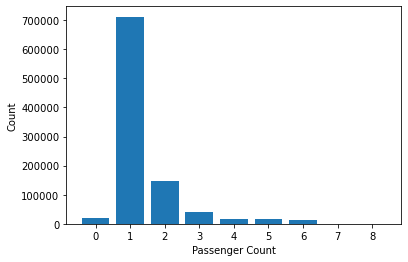

In [8]:
# Visualize bar chart for passenger count:
passenger_count = df0[['passenger_count', 'VendorID']].groupby('passenger_count').count().reset_index().rename(columns={'VendorID':'count'})
plt.bar(x=passenger_count['passenger_count'], height=passenger_count['count'])
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.xticks(np.arange(passenger_count['passenger_count'].min(),passenger_count['passenger_count'].max()+1,step=1))
passenger_count

**Notices:**
- Most taxi trips have one passenger.
- There are 19183 trip have zero passengers and that's weird in our case.
- There are 3 trips have 8 passengers and after searching for maximum passengers counts I have found that "The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated" so it mostly be an outliers.

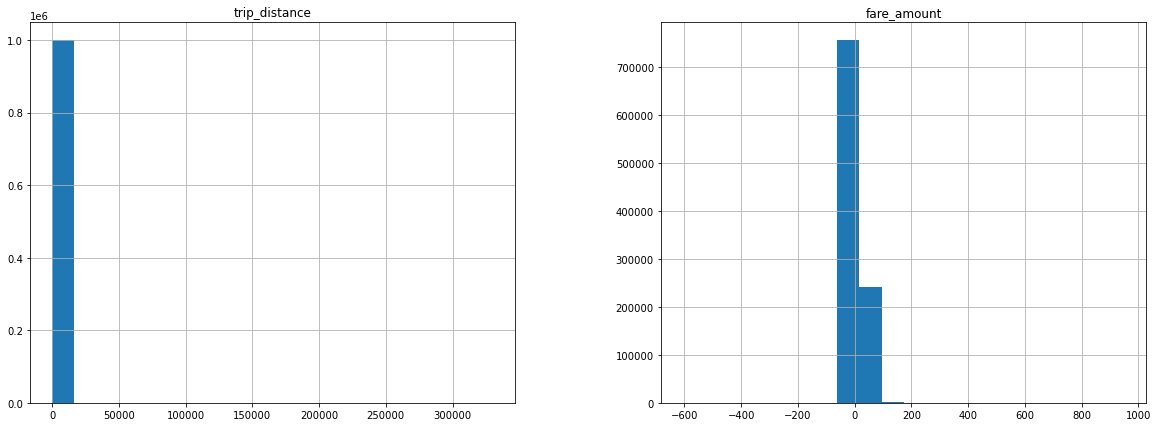

In [12]:
df0[['trip_distance','fare_amount']].hist(bins=20, figsize=(20,7))
plt.show()

The very big outliers prevent histogram from delivering insights about values distrbution.

In [19]:
q25, q75 = np.percentile(df0['trip_distance'], 25), np.percentile(df0['trip_distance'], 75)
iqr = q75 - q25
print("inter-quartile range", iqr)

inter-quartile range 2.46


In [20]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Lower value:',lower)
print('Upper value:', upper)

Lower value: -2.59
Upper value: 7.25


Because the lowe value is negative and the distance can't be negative, So I will set lower value to 0

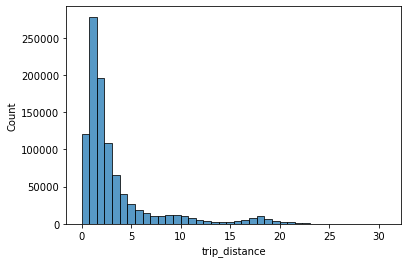

In [74]:
lower = 0
trip_distance_without_outliers = df0[((df0['trip_distance']>=lower) & (df0['trip_distance']<=upper))]
sns.histplot(trip_distance_without_outliers['trip_distance'], bins=40)
plt.show()

In [50]:
q25, q75 = np.percentile(df0['fare_amount'], 25), np.percentile(df0['fare_amount'], 75)
iqr = q75 - q25
print("inter-quartile range", iqr)

inter-quartile range 9.5


In [51]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print('Lower value:',lower)
print('Upper value:', upper)

Lower value: -7.25
Upper value: 30.75


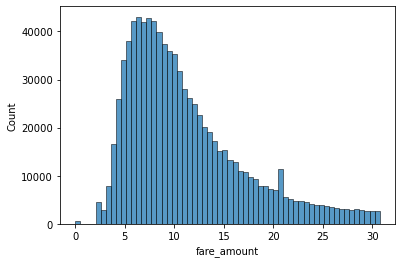

In [71]:
fare_amount_without_outliers = df0[((df0['fare_amount']>=lower) & (df0['fare_amount']<=upper))]
sns.histplot(fare_amount_without_outliers['fare_amount'], bins=60)
plt.show()

**Important Notices**

- These attributes have very different scales. I will deal with this later in feature scaling.
- histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

### 2.c <a id='missing'></a> **Missing Data:**

In [ ]:
# Number of missing values in each column
df0.isna().sum()

In [ ]:
# Number of rows have missing value/s
df0.isna().any(axis=1).sum()

In [ ]:
# Percentage of rows have missing value/s
print('Percentage of rows with missing value/s:',(df0.isna().any(axis=1).sum()/df0.shape[0])*100,'%')

We have 34362 rows (3.44% of the total rows in Dataset) with missing values in (passenger_count, RatecodeID, store_and_fwd_flag, airport_fee) columns.

In [ ]:
# Investigating rows with missing values:
mask = df0.isna().any(axis=1)
df_missing = df0[mask]
df_missing.head()

In [ ]:
df_missing.tail()

In [ ]:
plt.figure(figsize=(20,6))
df_date_missing = df_missing[['tpep_pickup_datetime','VendorID']]
df_date_missing['tpep_pickup_datetime'] = df_date_missing['tpep_pickup_datetime'].dt.date
df_date_missing = df_date_missing.groupby('tpep_pickup_datetime').count().reset_index().rename(columns={'VendorID':'trip_count'})
df_date_missing['percentage'] = (df_date_missing['trip_count']/df_missing.shape[0])*100
df_date_missing['missing'] = True
df_date = df0[['tpep_pickup_datetime','VendorID']]
df_date['tpep_pickup_datetime'] = df_date['tpep_pickup_datetime'].dt.date
df_date = df_date.groupby('tpep_pickup_datetime').count().reset_index().rename(columns={'VendorID':'trip_count'})
df_date['percentage'] = (df_date['trip_count']/df0.shape[0])*100
df_date['missing'] = False
df_date_combine = pd.concat([df_date_missing, df_date]).reset_index()
df_date_combine = df_date_combine[df_date_combine['tpep_pickup_datetime']>=datetime.date(2022,1,1)].sort_values(by='tpep_pickup_datetime').reset_index()
sns.lineplot(data = df_date_combine, x='tpep_pickup_datetime', y='percentage', hue='missing')

In [ ]:
df_vendor_missing = df_missing[['VendorID','trip_distance']].groupby('VendorID').count().reset_index().rename(columns={'trip_distance':'count'})
df_vendor_missing['percentage'] = (df_vendor_missing['count']/df_missing.shape[0])*100
df_vendor_missing['missing'] = True
df_vendor = df0[['VendorID','trip_distance']].groupby('VendorID').count().reset_index().rename(columns={'trip_distance':'count'})
df_vendor['percentage'] = (df_vendor['count']/df0.shape[0])*100
df_vendor['missing'] = False
df_vendor_combine = pd.concat([df_vendor_missing, df_vendor]).reset_index()
sns.barplot(data=df_vendor_combine, x='VendorID', y='percentage', hue='missing')

In [ ]:
(df_missing['payment_type'].value_counts()/df_missing.shape[0])*100

In [ ]:
(df0['payment_type'].value_counts()/df0.shape[0])*100

In [ ]:
sns.boxplot(data=[df0['trip_distance'],df_missing['trip_distance']], showfliers=False)

In [ ]:
sns.boxplot(data=[df0['fare_amount'],df_missing['fare_amount']], showfliers=False)

Because the records have missing values is not a large percentage of our dataset (3.44%), and the records have missing values in 4 columns, So I will drop this records from our dataset.

In [ ]:
df = df0.dropna()
df.head()

In [ ]:
# Checking if their any missing values yet.
df.info()

Now our dataset hasn't any missing values.

### 2.d <a id='outliers'></a> **Outliers:**